In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'

-rw------- 1 root root 82003032 Mar 24 00:14 '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'


In [4]:
import pandas as pd

url = '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'
DF = pd.read_pickle(url, compression='gzip')

DF.shape

(24916, 2701)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [6]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


In [12]:
DF.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2696    0
2697    0
2698    0
2699    0
2700    0
Length: 2701, dtype: int64

In [14]:
DF[10]

0        223
1        249
2        101
3        126
4        218
        ... 
24911     59
24912     89
24913    140
24914    113
24915     92
Name: 10, Length: 24916, dtype: object

In [9]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((24916, 2700), (24916,))

G80스포츠


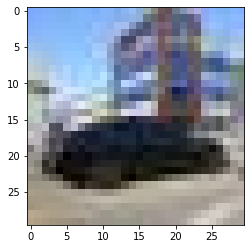

In [15]:
import numpy as np
import matplotlib.pyplot as plt

print(y.iloc[10])
plt.imshow(X.iloc[10].values.astype(np.int).reshape(30,30,3))
plt.show()

G80스포츠


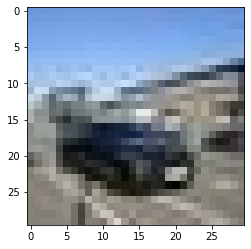

In [22]:
print(y.iloc[200])

plt.imshow(X.iloc[200].values.astype(np.int).reshape(30,30,3))
plt.show()

In [24]:
print(len(y.value_counts()))
print(y.value_counts())


34
투싼            1931
i30           1296
싼타페           1282
그랜저HG240       940
KONA 1         840
그랜저            770
소나타 YF         762
소나타 뉴라이즈       725
G90            714
소나타 하이브리드      664
아슬란            659
더뉴아반떼AD        653
소나타 LF         653
제네시스G380       652
소나타 LPI        646
엑센트            641
아반떼 XD         639
제네시스 G80       638
아반떼MD          636
소나타            635
아이오닉 하이브리드     633
투싼1            628
팰리세이드          628
아반떼AD          627
그랜저 IG         627
아이오닉 일렉트릭      620
벨로스터           620
에쿠스            619
스타렉스           614
G80스포츠         605
맥스크루즈          605
소나타 NF         605
제네시스 G70       600
더뉴그랜드스타렉스      509
Name: 2700, dtype: int64


In [25]:
X = X.values
y = y.values
print(X[:5], y[:5])

[[230 236 252 ... 55 54 52]
 [235 238 243 ... 124 123 118]
 [94 112 134 ... 80 91 95]
 [80 88 90 ... 104 114 124]
 [215 229 194 ... 81 96 101]] ['G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠' 'G80스포츠']


In [32]:
type(X)

numpy.ndarray

In [26]:
X_array = X.astype(float)/255

In [27]:
X_array[:1]

array([[0.90196078, 0.9254902 , 0.98823529, ..., 0.21568627, 0.21176471,
        0.20392157]])

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_LE = encoder.fit_transform(y)
y_LE

array([ 0,  0,  0, ..., 33, 33, 33])

In [29]:
from keras.utils import to_categorical

y_LE = to_categorical(y_LE)
print(y_LE[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_array, y_LE, test_size=0.2, random_state=2045)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(19932, 2700) (19932, 34) (4984, 2700) (4984, 34)


In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(15945, 2700) (15945, 34) (3987, 2700) (3987, 34)


# RNN

In [42]:
from keras import models, layers, regularizers

RNN = models.Sequential()
RNN.add(layers.Dense(512, input_shape=(2700,), kernel_regularizer = regularizers.l2(0.00001)))
RNN.add(layers.BatchNormalization())
RNN.add(layers.Activation('relu'))
RNN.add(layers.Dropout(0.5))
RNN.add(layers.Dense(1024, kernel_regularizer = regularizers.l2(0.00001)))
RNN.add(layers.BatchNormalization())
RNN.add(layers.Activation('relu'))
RNN.add(layers.Dropout(0.5))
RNN.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.00001)))
RNN.add(layers.BatchNormalization())
RNN.add(layers.Activation('relu'))
RNN.add(layers.Dropout(0.5))
RNN.add(layers.Dense(245, activation='relu'))
RNN.add(layers.Dropout(0.5))
RNN.add(layers.Dense(34, activation = 'softmax'))

RNN.summary()

RNN.compile(loss='categorical_crossentropy', optimizer = 'adam' ,metrics=['accuracy'])



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               1382912   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              525312    
_________________________________________________________________
batch_normalization_14 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_14 (Activation)   (None, 1024)             

In [45]:
Hist_RNN = RNN.fit(X_train, y_train, epochs=500, batch_size=520, validation_data=(X_valid, y_valid))

Epoch 1/500
31/31 [==============================] - 0s 14ms/step - loss: 1.2321 - accuracy: 0.6111 - val_loss: 2.4215 - val_accuracy: 0.3396
Epoch 2/500
31/31 [==============================] - 0s 11ms/step - loss: 1.2475 - accuracy: 0.6059 - val_loss: 2.2048 - val_accuracy: 0.3893
Epoch 3/500
31/31 [==============================] - 0s 10ms/step - loss: 1.2213 - accuracy: 0.6184 - val_loss: 2.1346 - val_accuracy: 0.3943
Epoch 4/500
31/31 [==============================] - 0s 10ms/step - loss: 1.2191 - accuracy: 0.6182 - val_loss: 2.3758 - val_accuracy: 0.3604
Epoch 5/500
31/31 [==============================] - 0s 10ms/step - loss: 1.2135 - accuracy: 0.6211 - val_loss: 2.4532 - val_accuracy: 0.3501
Epoch 6/500
31/31 [==============================] - 0s 10ms/step - loss: 1.2016 - accuracy: 0.6298 - val_loss: 2.4099 - val_accuracy: 0.3547
Epoch 7/500
31/31 [==============================] - 0s 10ms/step - loss: 1.1883 - accuracy: 0.6289 - val_loss: 2.2923 - val_accuracy: 0.3695
Epoch 

In [44]:
loss, accuracy = RNN.evaluate(X_test, y_test)

loss, accuracy

156/156 [==============================] - 0s 2ms/step - loss: 2.2837 - accuracy: 0.3654


(2.2836577892303467, 0.36536917090415955)

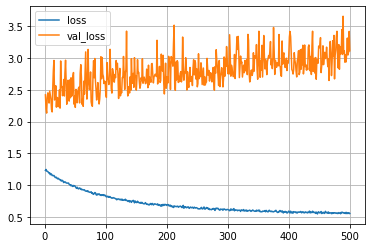

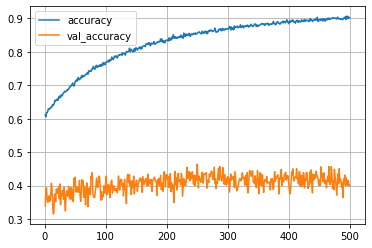

In [47]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_RNN.history['loss'])+1)

plt.plot(epochs, Hist_RNN.history['loss'])
plt.plot(epochs, Hist_RNN.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist_RNN.history['accuracy'])
plt.plot(epochs, Hist_RNN.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.show()

# CNN

In [48]:
X_train = X_train.reshape((15945, 30,30,3))
X_valid =X_valid.reshape((3987, 30,30,3))
X_test= X_test.reshape((4984, 30,30,3))
X_train.shape, X_valid.shape, X_test.shape

((15945, 30, 30, 3), (3987, 30, 30, 3), (4984, 30, 30, 3))

In [57]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
X_valid_datagen = ImageDataGenerator()
X_test_datagen = ImageDataGenerator()

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=1063)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=332)
test_generator = X_test_datagen.flow(X_test, y_test, batch_size=332)

In [59]:
from keras import layers, models

CNN_basic = models.Sequential()
CNN_basic.add(layers.Conv2D(32, (2,2), activation='relu', input_shape=(30,30,3), padding='same'))
CNN_basic.add(layers.MaxPool2D((2,2)))

CNN_basic.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.MaxPool2D((2,2)))

CNN_basic.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.Conv2D(245, (3,3), activation='relu', padding='same'))

CNN_basic.add(layers.Flatten())
CNN_basic.add(layers.Dense(units=512, activation='relu'))
CNN_basic.add(layers.Dropout(0.5))
CNN_basic.add(layers.Dense(units=34, activation='softmax'))

CNN_basic.summary()

CNN_basic.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 245)        

In [61]:
%%time
Hist_CNN_basic = CNN_basic.fit(train_generator, steps_per_epoch=len(X_train)/1063 , epochs = 100,
                               validation_data=valid_generator, validation_steps=len(X_valid)/332)

Epoch 1/100
15/15 [==============================] - 39s 469ms/step - loss: 3.5115 - accuracy: 0.0583 - val_loss: 3.4378 - val_accuracy: 0.0742
Epoch 2/100
15/15 [==============================] - 7s 453ms/step - loss: 3.4155 - accuracy: 0.0817 - val_loss: 3.2072 - val_accuracy: 0.1013
Epoch 3/100
15/15 [==============================] - 7s 453ms/step - loss: 3.2873 - accuracy: 0.0839 - val_loss: 3.1201 - val_accuracy: 0.1121
Epoch 4/100
15/15 [==============================] - 7s 452ms/step - loss: 3.1855 - accuracy: 0.0948 - val_loss: 3.0490 - val_accuracy: 0.1141
Epoch 5/100
15/15 [==============================] - 7s 454ms/step - loss: 3.1273 - accuracy: 0.0925 - val_loss: 3.0600 - val_accuracy: 0.1086
Epoch 6/100
15/15 [==============================] - 7s 453ms/step - loss: 3.0530 - accuracy: 0.0999 - val_loss: 3.0209 - val_accuracy: 0.1221
Epoch 7/100
15/15 [==============================] - 7s 454ms/step - loss: 2.9882 - accuracy: 0.1134 - val_loss: 3.0292 - val_accuracy: 0.108

In [68]:
loss1, accuracy1 = CNN_basic.evaluate(X_test, y_test)

loss1, accuracy1 

156/156 [==============================] - 1s 4ms/step - loss: 1.8425 - accuracy: 0.5650


(1.8425322771072388, 0.5650080442428589)

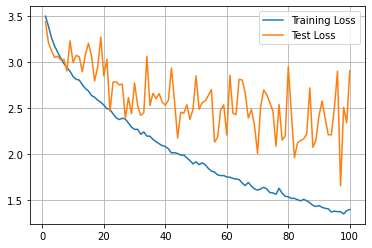

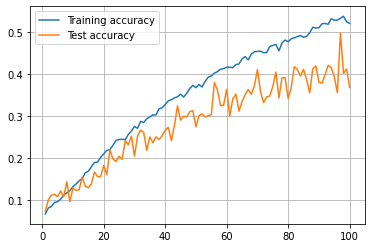

In [63]:

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN_basic.history['loss'])+1)


plt.plot(epochs, Hist_CNN_basic.history['loss'])
plt.plot(epochs, Hist_CNN_basic.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN_basic.history['accuracy'])
plt.plot(epochs, Hist_CNN_basic.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

# bach_size 낮춰서

In [64]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
X_valid_datagen = ImageDataGenerator()
X_test_datagen = ImageDataGenerator()

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=332)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=332)
test_generator = X_test_datagen.flow(X_test, y_test, batch_size=332)

In [65]:
%%time
Hist_CNN_basic = CNN_basic.fit(train_generator, steps_per_epoch=len(X_train)/332 , epochs = 100,
                               validation_data=valid_generator, validation_steps=len(X_valid)/332)

Epoch 1/100
48/48 [==============================] - 8s 152ms/step - loss: 1.9366 - accuracy: 0.3843 - val_loss: 2.1389 - val_accuracy: 0.3619
Epoch 2/100
48/48 [==============================] - 7s 155ms/step - loss: 1.6577 - accuracy: 0.4502 - val_loss: 2.4124 - val_accuracy: 0.3923
Epoch 3/100
48/48 [==============================] - 7s 154ms/step - loss: 1.6147 - accuracy: 0.4623 - val_loss: 1.8906 - val_accuracy: 0.4196
Epoch 4/100
48/48 [==============================] - 7s 157ms/step - loss: 1.6541 - accuracy: 0.4486 - val_loss: 2.1035 - val_accuracy: 0.4128
Epoch 5/100
48/48 [==============================] - 7s 155ms/step - loss: 1.6321 - accuracy: 0.4546 - val_loss: 1.9753 - val_accuracy: 0.4186
Epoch 6/100
48/48 [==============================] - 8s 156ms/step - loss: 1.6335 - accuracy: 0.4534 - val_loss: 1.9595 - val_accuracy: 0.4146
Epoch 7/100
48/48 [==============================] - 8s 157ms/step - loss: 1.4634 - accuracy: 0.5039 - val_loss: 2.0453 - val_accuracy: 0.4296

156/156 [==============================] - 1s 4ms/step - loss: 1.8425 - accuracy: 0.5650
1.8425322771072388 0.5650080442428589


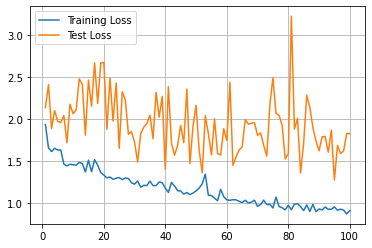

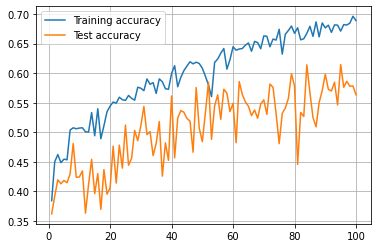

In [66]:
loss1, accuracy1 = CNN_basic.evaluate(X_test, y_test)

print(loss1, accuracy1 )

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN_basic.history['loss'])+1)


plt.plot(epochs, Hist_CNN_basic.history['loss'])
plt.plot(epochs, Hist_CNN_basic.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN_basic.history['accuracy'])
plt.plot(epochs, Hist_CNN_basic.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

# batch_size up

In [69]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
X_valid_datagen = ImageDataGenerator()
X_test_datagen = ImageDataGenerator()

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=1024)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=1024)
test_generator = X_test_datagen.flow(X_test, y_test, batch_size=1024)

In [70]:
%%time
Hist_CNN_basic = CNN_basic.fit(train_generator, steps_per_epoch=len(X_train)/1024 , epochs = 100,
                               validation_data=valid_generator, validation_steps=len(X_valid)/1024)

Epoch 1/100
15/15 [==============================] - 10s 528ms/step - loss: 0.8045 - accuracy: 0.7205 - val_loss: 1.7099 - val_accuracy: 0.5862
Epoch 2/100
15/15 [==============================] - 7s 437ms/step - loss: 0.7631 - accuracy: 0.7277 - val_loss: 1.5378 - val_accuracy: 0.6195
Epoch 3/100
15/15 [==============================] - 7s 437ms/step - loss: 0.7362 - accuracy: 0.7392 - val_loss: 1.5672 - val_accuracy: 0.6225
Epoch 4/100
15/15 [==============================] - 7s 437ms/step - loss: 0.7363 - accuracy: 0.7394 - val_loss: 1.7988 - val_accuracy: 0.5957
Epoch 5/100
15/15 [==============================] - 7s 435ms/step - loss: 0.7147 - accuracy: 0.7447 - val_loss: 1.8189 - val_accuracy: 0.5972
Epoch 6/100
15/15 [==============================] - 7s 448ms/step - loss: 0.7174 - accuracy: 0.7451 - val_loss: 1.5535 - val_accuracy: 0.6265
Epoch 7/100
15/15 [==============================] - 7s 438ms/step - loss: 0.7138 - accuracy: 0.7461 - val_loss: 1.7417 - val_accuracy: 0.603

156/156 [==============================] - 1s 3ms/step - loss: 1.5103 - accuracy: 0.6679
1.5103392601013184 0.6679373979568481


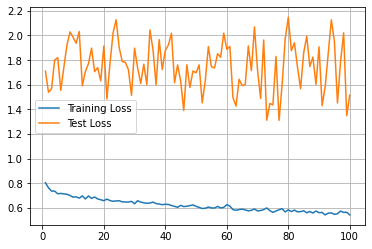

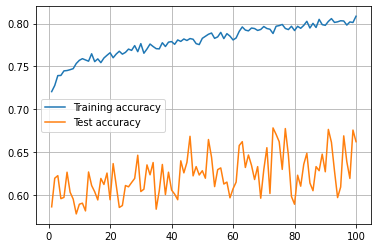

In [71]:
loss1, accuracy1 = CNN_basic.evaluate(X_test, y_test)

print(loss1, accuracy1 )

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN_basic.history['loss'])+1)


plt.plot(epochs, Hist_CNN_basic.history['loss'])
plt.plot(epochs, Hist_CNN_basic.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN_basic.history['accuracy'])
plt.plot(epochs, Hist_CNN_basic.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()

# layer ++

In [74]:
from keras import layers, models

CNN_basic = models.Sequential()
CNN_basic.add(layers.Conv2D(64, (2,2), activation='relu', input_shape=(30,30,3), padding='same'))
CNN_basic.add(layers.Dropout(0.5))
CNN_basic.add(layers.MaxPool2D((2,2)))

CNN_basic.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.Dropout(0.5))
CNN_basic.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.Dropout(0.5))

CNN_basic.add(layers.Conv2D(245, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.Dropout(0.5))
CNN_basic.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.MaxPool2D((2,2)))
CNN_basic.add(layers.Dropout(0.5))
CNN_basic.add(layers.Conv2D(512, (3,3), activation='relu', padding='same'))
CNN_basic.add(layers.MaxPool2D((2,2)))
CNN_basic.add(layers.Dropout(0.5))
CNN_basic.add(layers.Conv2D(1024, (3,3), activation='relu', padding='same'))

CNN_basic.add(layers.Flatten())
CNN_basic.add(layers.Dense(units=512, activation='relu'))
CNN_basic.add(layers.Dropout(0.5))
CNN_basic.add(layers.Dense(units=34, activation='softmax'))

CNN_basic.summary()

CNN_basic.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 64)        832       
_________________________________________________________________
dropout_29 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
dropout_30 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 15, 128)     

In [75]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
X_valid_datagen = ImageDataGenerator()
X_test_datagen = ImageDataGenerator()

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=3987)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=3987)
test_generator = X_test_datagen.flow(X_test, y_test, batch_size=1024)

In [ ]:
((15945, 30, 30, 3), (3987, 30, 30, 3), (4984, 30, 30, 3))

In [ ]:
%%time
Hist_CNN_basic = CNN_basic.fit(train_generator, steps_per_epoch=len(X_train)/3987 , epochs = 100,
                               validation_data=valid_generator, validation_steps=len(X_valid)/3987)

Epoch 1/100
3/3 [==============================] - 90s 15s/step - loss: 4.0542 - accuracy: 0.0483 - val_loss: 3.5260 - val_accuracy: 0.0547
Epoch 2/100
3/3 [==============================] - 14s 3s/step - loss: 3.5260 - accuracy: 0.0513 - val_loss: 3.5256 - val_accuracy: 0.0547
Epoch 3/100
3/3 [==============================] - 14s 3s/step - loss: 3.5255 - accuracy: 0.0494 - val_loss: 3.5249 - val_accuracy: 0.0529
Epoch 4/100
3/3 [==============================] - 13s 3s/step - loss: 3.5249 - accuracy: 0.0517 - val_loss: 3.5239 - val_accuracy: 0.0529
Epoch 5/100
3/3 [==============================] - 13s 3s/step - loss: 3.5236 - accuracy: 0.0489 - val_loss: 3.5224 - val_accuracy: 0.0529
Epoch 6/100
3/3 [==============================] - 13s 3s/step - loss: 3.5220 - accuracy: 0.0537 - val_loss: 3.5201 - val_accuracy: 0.0529
Epoch 7/100
3/3 [==============================] - 13s 3s/step - loss: 3.5194 - accuracy: 0.0501 - val_loss: 3.5161 - val_accuracy: 0.0529
Epoch 8/100
3/3 [=========

156/156 [==============================] - 1s 3ms/step - loss: 1.5103 - accuracy: 0.6679
1.5103392601013184 0.6679373979568481


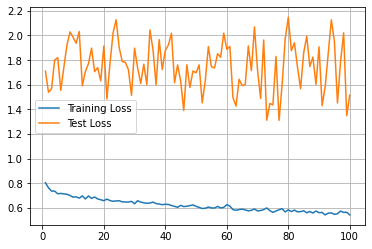

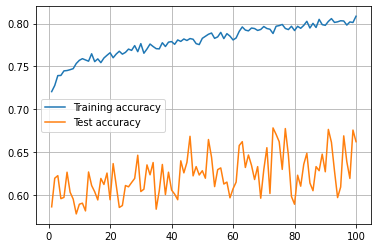

In [ ]:
loss1, accuracy1 = CNN_basic.evaluate(X_test, y_test)

print(loss1, accuracy1 )

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_CNN_basic.history['loss'])+1)


plt.plot(epochs, Hist_CNN_basic.history['loss'])
plt.plot(epochs, Hist_CNN_basic.history['val_loss'])
plt.legend(['Training Loss','Test Loss'])
plt.grid()
plt.show()



plt.plot(epochs, Hist_CNN_basic.history['accuracy'])
plt.plot(epochs, Hist_CNN_basic.history['val_accuracy'])
plt.legend(['Training accuracy','Test accuracy'])
plt.grid()
plt.show()